#Predicting Air Quality Index(AQI) with the help of PM2.5, PM10, NO2, O3, CO, and  SO2

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
#Acessing google drive from google colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Loading the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Dissertation/clean_data.csv')

In [4]:
#showing the first few data from the dataset
df.head(5)

,pubtime,PM2.5,PM10,NO2,O3,CO,SO2,AQI
0,2020-06-30 00:00:00,11.0,23.0,26.0,70.0,0.7,5.0,23.0
1,2020-06-30 01:00:00,14.0,23.0,29.0,54.0,0.8,5.0,23.0
2,2020-06-30 02:00:00,11.0,23.0,31.0,48.0,0.7,5.0,23.0
3,2020-06-30 03:00:00,12.0,25.0,42.0,26.0,0.7,5.0,25.0
4,2020-06-30 04:00:00,7.0,29.0,36.0,22.0,0.7,5.0,29.0


In [5]:
df.shape

(4417, 8)

#Linear Regression Model

In [6]:
#dropping all column except feature column PM2.5, PM10, No2, O3, CO and SO2 and store in x
x= df.drop(columns = ['pubtime','AQI'])
x

,PM2.5,PM10,NO2,O3,CO,SO2
0,11.0,23.0,26.0,70.0,0.7,5.0
1,14.0,23.0,29.0,54.0,0.8,5.0
2,11.0,23.0,31.0,48.0,0.7,5.0
3,12.0,25.0,42.0,26.0,0.7,5.0
4,7.0,29.0,36.0,22.0,0.7,5.0
...,...,...,...,...,...,...
4412,21.0,59.0,35.0,42.0,0.8,6.0
4413,22.0,65.0,35.0,40.0,0.8,6.0
4414,26.0,64.0,30.0,43.0,0.8,6.0
4415,24.0,58.0,30.0,42.0,0.8,6.0


In [7]:
#storing target column in y
y = df['AQI']
y

0       23.0
1       23.0
2       23.0
3       25.0
4       29.0
        ... 
4412    55.0
4413    58.0
4414    57.0
4415    54.0
4416    56.0
Name: AQI, Length: 4417, dtype: float64

In [8]:
#splitting test train data by using train_test_split libraries from sklearn
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2,random_state=0)


In [9]:
#fitting the model
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
#calculating intercept c
c = lr.intercept_
c

5.5155327552498505

In [11]:
# Calculating coefficient m
m = lr.coef_
m

array([ 0.47231332,  0.46027295,  0.07279498,  0.12498361,  0.45818509,
       -0.11613176])

In [12]:
#predicting y training values
y_pred_train = lr.predict(x_train)
y_pred_train

array([ 67.55684847, 133.78640886,  86.17313307, ...,  61.47821071,
        20.83214596,  63.06363449])

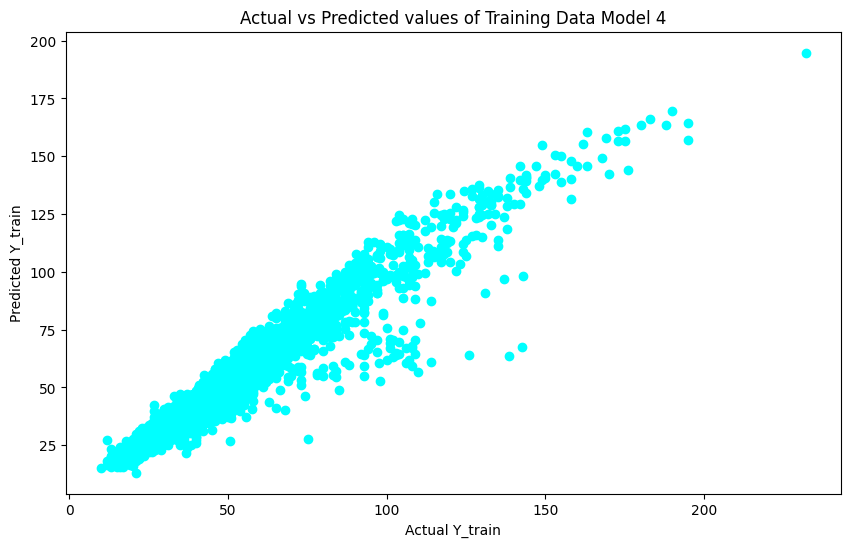

In [13]:
# Plotting Training Actual values vs Predicted Values
plt.figure(figsize=(10, 6))
# Scatter plot of training data (actual values)
plt.scatter(y_train, y_pred_train, color='cyan')
# Labels
plt.xlabel('Actual Y_train')
plt.ylabel('Predicted Y_train')
plt.title('Actual vs Predicted values of Training Data Model 4')
# Display the plot
plt.show()


In [14]:
#Prdicitng y testing values
y_pred_test = lr.predict(x_test)
y_pred_test

array([ 42.95805657,  32.90126512,  65.56925782,  53.53525499,
        77.51276055,  43.16314388,  19.63328739,  40.27179523,
        63.36811579,  55.22226378,  29.08805237,  42.46231128,
        21.16380348,  37.42270641,  68.35434596, 108.21743474,
       118.75539705,  36.8976854 ,  38.41041957,  42.78687018,
        55.22336192, 125.94554754,  61.62625043,  76.21152695,
        48.72414677,  54.15469926,  65.5984199 ,  40.96025461,
        48.05241195,  36.60921022,  45.7395991 , 119.22627241,
        61.14710317, 106.71221691,  72.8515455 ,  34.48702286,
        53.34591231,  32.34242491, 108.58546072,  44.56162548,
        42.00495588,  91.81097823,  53.06467757,  92.57448901,
        23.40260679,  38.51191192,  32.84044191,  40.52547571,
        45.28791461,  94.03449133,  39.27784137,  40.56572805,
        22.48377682,  97.92254721,  66.9207901 ,  55.12497078,
        48.48444633,  42.19141104,  56.19719314,  23.78947584,
        33.94280515,  61.15878668,  45.59392462,  43.79

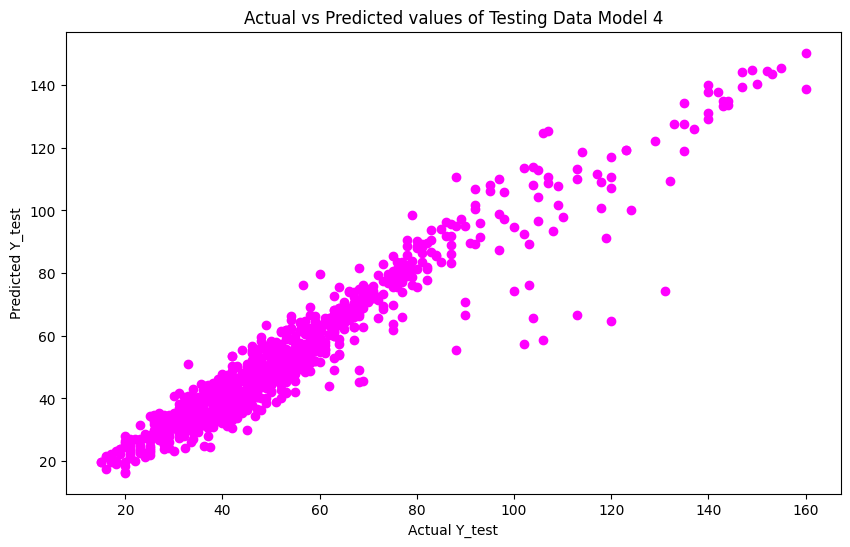

In [15]:

#Plotting  Testing Actual values vs Predicted Vlaues
plt.figure(figsize=(10, 6))
# Scatter plot of testing data
plt.scatter(y_test, y_pred_test, color ='magenta')
# Labels
plt.xlabel('Actual Y_test')
plt.ylabel('Predicted Y_test')
plt.title('Actual vs Predicted values of Testing Data Model 4')
# Display the plot
plt.show()


In [16]:
#Calculating training data error term for linear regression
res_train = (y_train - y_pred_train)
res_train

4339    75.193152
4275    -0.786409
3849     6.826867
883     -6.658975
134      3.075921
          ...    
1033    -2.110831
3264     6.847799
1653    -9.478211
2607    -1.832146
2732    -5.063634
Name: AQI, Length: 3533, dtype: float64

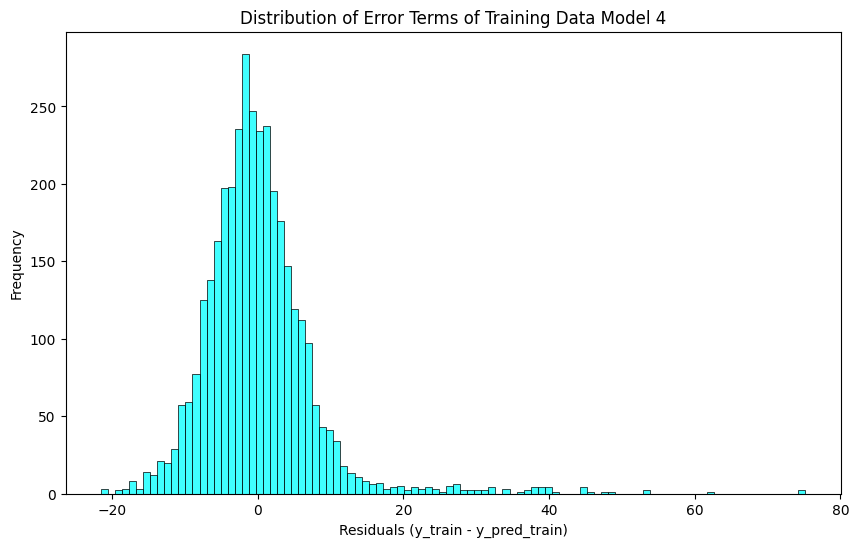

In [17]:
# Plotting histogram to show the error terms for trainig data
plt.figure(figsize=(10, 6))
# Creating the histogram plot using Seaborn
sns.histplot(res_train , color = 'cyan')

# Label the plot
plt.title('Distribution of Error Terms of Training Data Model 4')
plt.xlabel('Residuals (y_train - y_pred_train)')
plt.ylabel('Frequency')
plt.show()

In [18]:
#Calculating testing data error term for linear regression
res_test = (y_test - y_pred_test)
res_test

2917    -4.958057
1457    -3.901265
1669    38.430742
2013    -0.535255
4303    -2.512761
          ...    
2527    -2.917410
2339    -0.027498
3276     2.178360
3354    -1.392195
3019    -7.047351
Name: AQI, Length: 884, dtype: float64

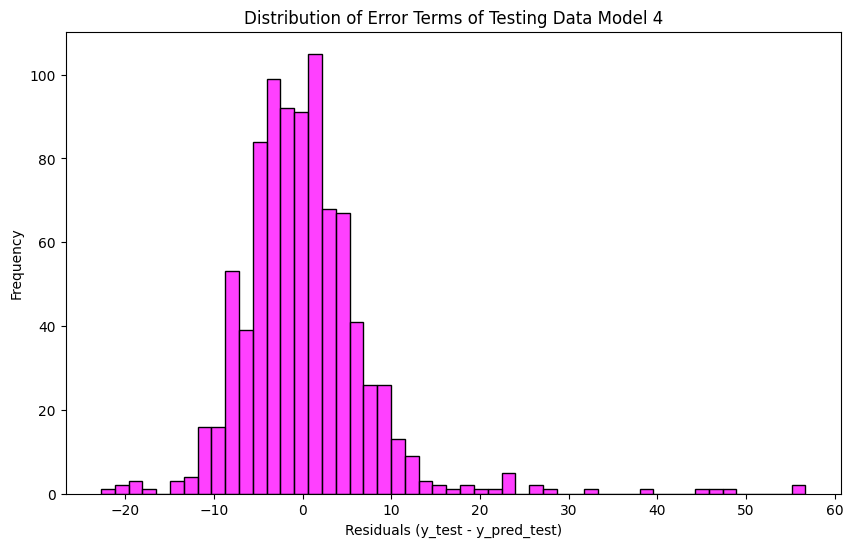

In [19]:
# Plotting histogram to show the error terms for testing data
plt.figure(figsize=(10, 6))
# Creating the histogram plot using Seaborn
sns.histplot(res_test , color ='magenta')

# Label the plot
plt.title('Distribution of Error Terms of Testing Data Model 4')
plt.xlabel('Residuals (y_test - y_pred_test)')
plt.ylabel('Frequency')
plt.show()

Evaluation of Linear Regression

#Training Data

In [20]:
#Calculating Mean Squared Error of Training Data
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE) of Training Data:", mse)

Mean Squared Error (MSE) of Training Data: 58.33351774880525


In [21]:
#calculating Root Mean Squared Error of Training Data
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of Training Data:", rmse)

Root Mean Squared Error (RMSE) of Training Data: 7.637638231076754


In [22]:
#Calculating Mean Absolute Error of Training Data
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (MAE) of Training Data:", mae)

Mean Absolute Error (MAE) of Training Data: 5.095290973689186


In [23]:
#Calculating R-Squared of Training Data
rsquare =  r2_score(y_train, y_pred_train)
print("R-sqaured of Training Data:", rsquare)

R-sqaured of Training Data: 0.9131732981558712


###Testing Data

In [24]:
#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) of Testing Data :", mse)

Mean Squared Error (MSE) of Testing Data : 55.27674743256018


In [25]:
#calculating Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of Testing Data:", rmse)

Root Mean Squared Error (RMSE) of Testing Data: 7.434833382972356


In [26]:
#Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE) of Testing Data:", mae)

Mean Absolute Error (MAE) of Testing Data: 5.014977049917288


In [27]:
#Calculating R-Squared  of Testing Data
rsquare =  r2_score(y_test, y_pred_test)
print("R-sqaured of Testing Data:", rsquare)

R-sqaured of Testing Data: 0.9162446359077496
